In [1]:
import numpy as np
import pandas as pd
import proplot as pplot
import matplotlib.pyplot as plt
import json

In [2]:
with open("./results_HTCW=1HRCP=0_energy.json","r") as fp:
    results10energy=json.load(fp)

with open("./results_HTCW=0HRCP=1_energy.json","r") as fp:
    results01energy=json.load(fp)

with open("./results_HTCW=1HRCP=1_energy.json","r") as fp:
    results11energy=json.load(fp)

with open("./results_HTCW=0HRCP=1_economic.json","r") as fp:
    results01economic=json.load(fp)

In [29]:
powers=[results10energy["metrics"]["energy"]["total_power"],
results01energy["metrics"]["energy"]["total_power"],
results11energy["metrics"]["energy"]["total_power"],
results01economic["metrics"]["energy"]["total_power"]]

m_water=[results10energy["plant"]["carb"]["m_water_in"],
results01energy["plant"]["carb"]["m_water_in"],
results11energy["plant"]["carb"]["m_water_in"],
results01economic["plant"]["carb"]["m_water_in"]]

heat_eff=[results10energy["metrics"]["energy"]["heat_storage_eff"],
results01energy["metrics"]["energy"]["heat_storage_eff"],
results11energy["metrics"]["energy"]["heat_storage_eff"],
results01economic["metrics"]["energy"]["heat_storage_eff"]]

sep_eff=[results10energy["metrics"]["energy"]["sep_eff2"],
results01energy["metrics"]["energy"]["sep_eff2"],
results11energy["metrics"]["energy"]["sep_eff2"],
results01economic["metrics"]["energy"]["sep_eff2"]]

costs=[results10energy["metrics"]["economic"]["total"],
results01energy["metrics"]["economic"]["total"],
results11energy["metrics"]["economic"]["total"],
results01economic["metrics"]["economic"]["total"]]

carb_hen=[results10energy["plant"]["carb"]["total_HEN_area"],
results01energy["plant"]["carb"]["total_HEN_area"],
results11energy["plant"]["carb"]["total_HEN_area"],
results01economic["plant"]["carb"]["total_HEN_area"]]


labels=["HTCW,energy","HRCP,energy","hydbrid,energy","HRCP,economy"]


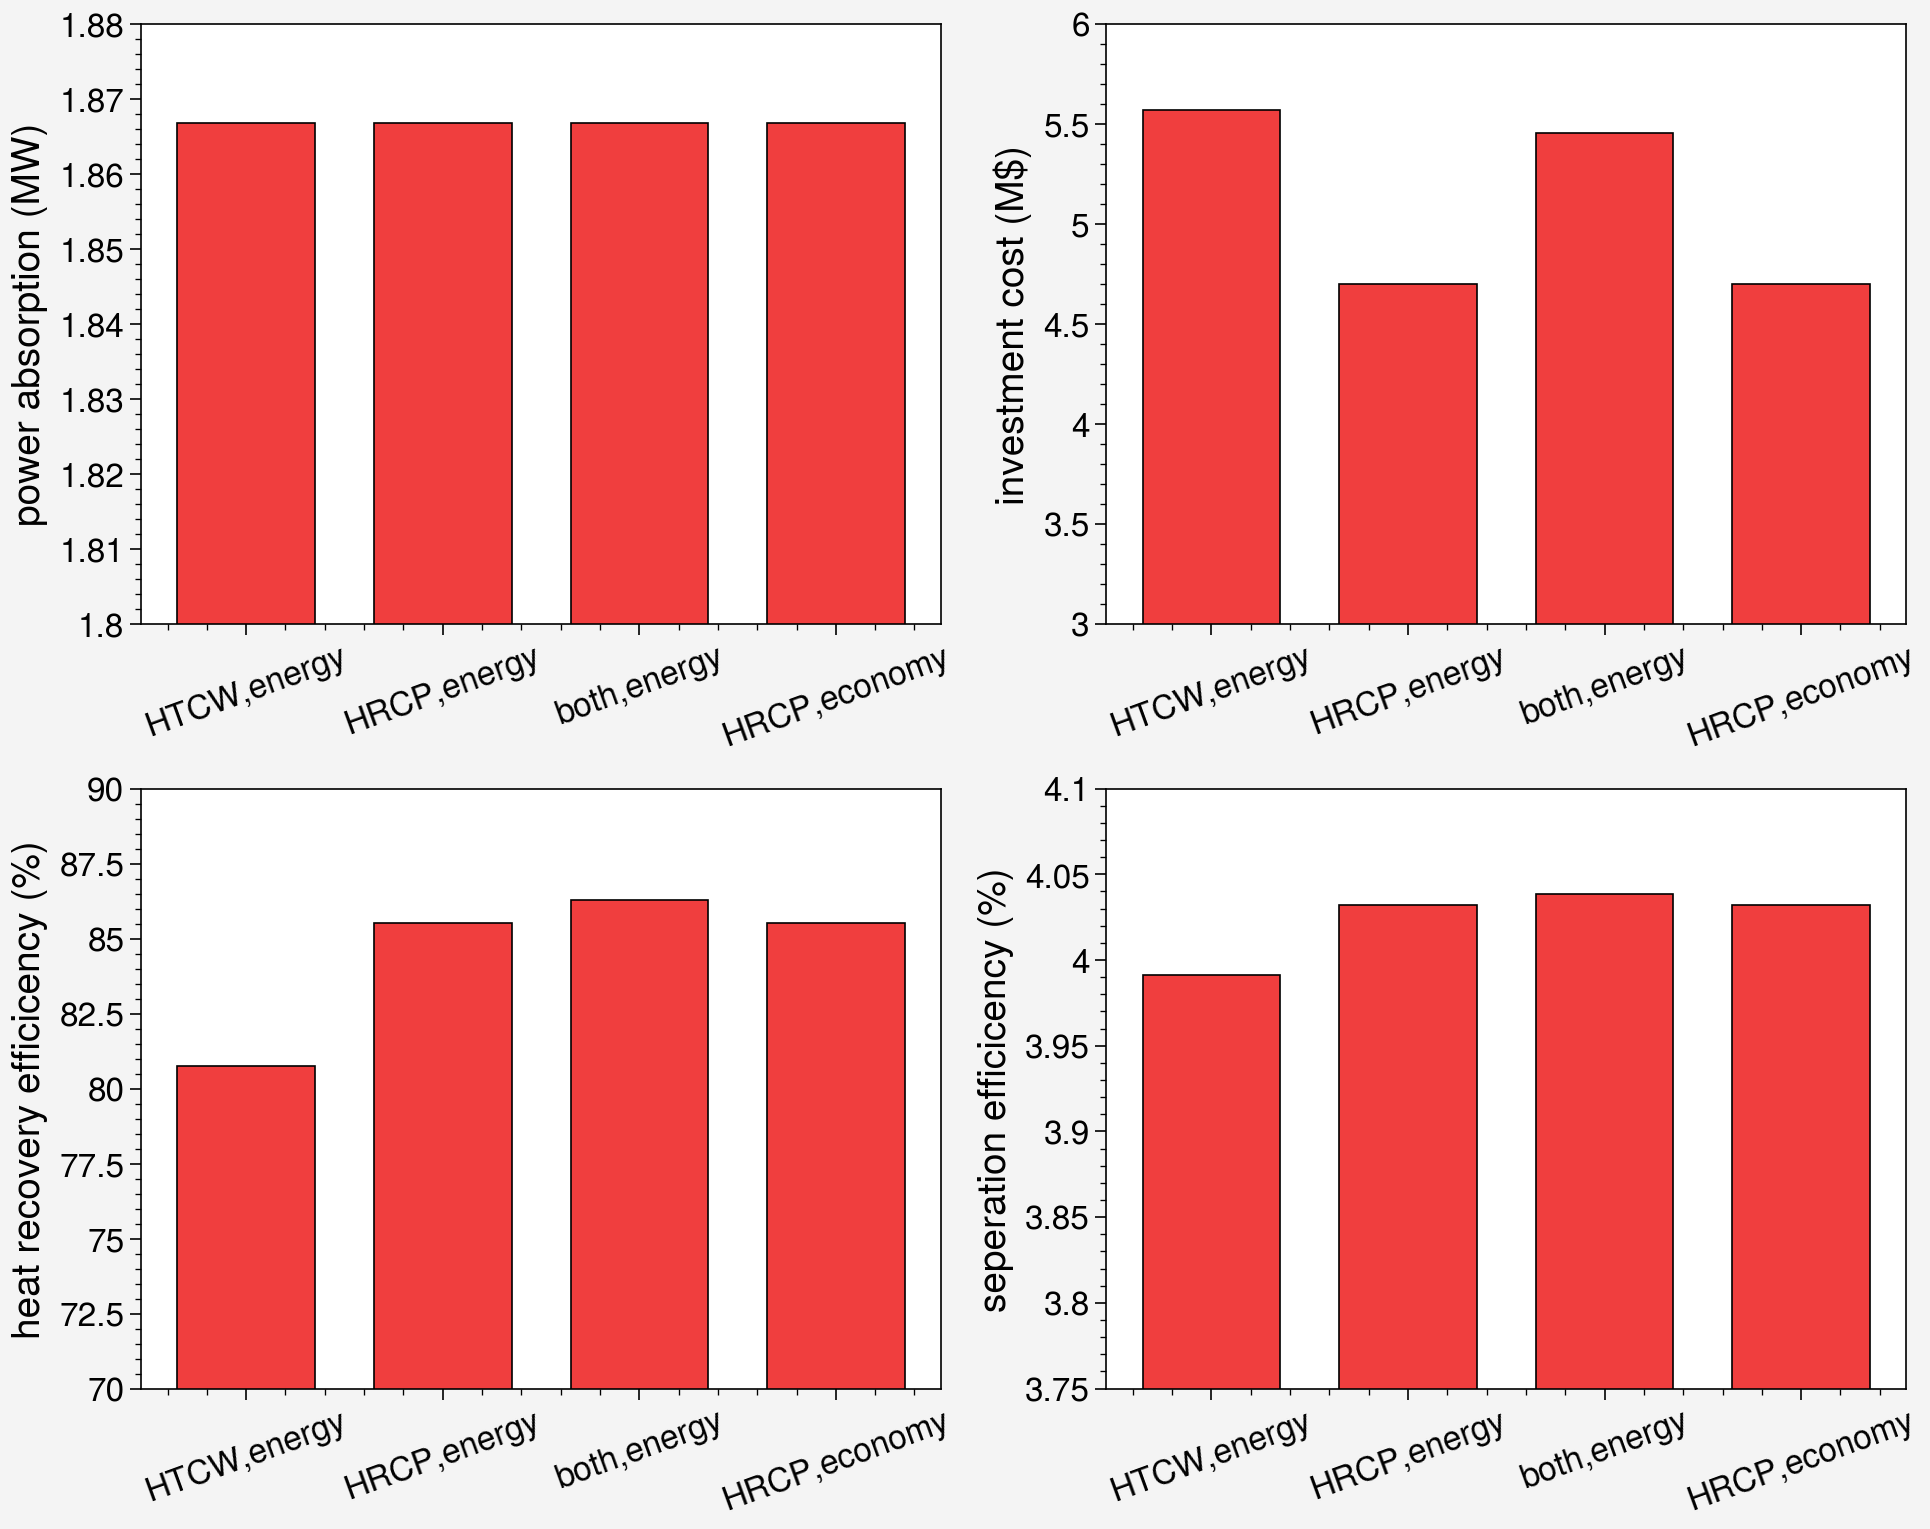

In [21]:
rotation=20
with pplot.rc.context({'lines.linewidth': 2,"lines.marker":"o","ytick.labelsize":12,"xtick.labelsize":12,
    "axes.labelsize":14,"lines.markersize":4,"legend.fontsize":14,"axes.titlesize":14,"grid":False}):
    fig, axs = pplot.subplots(refaspect=(4, 3),axwidth=4,ncols=2, nrows=2, share=False)
    indexs=np.arange(0,len(labels))
    axs[0].bar(np.array(powers)/1e6, width=0.7, negpos=True, edgecolor='k')
    axs[0].set_xticks(ticks=indexs)
    axs[0].set_xticklabels(labels=labels,rotation=rotation)
    axs[0].format(ylim=[1.8,1.88])
    axs[0].set_ylabel(ylabel="power absorption (MW)")

    axs[1].bar(np.array(costs), width=0.7, negpos=True, edgecolor='k')
    axs[1].set_xticks(ticks=indexs)
    axs[1].set_xticklabels(labels=labels,rotation=rotation)
    axs[1].format(ylim=[3,6],)
    axs[1].set_ylabel(ylabel="investment cost (M$)")

    axs[2].bar(np.array(heat_eff)*100, width=0.7, negpos=True, edgecolor='k')
    axs[2].set_xticks(ticks=indexs)
    axs[2].set_xticklabels(labels=labels,rotation=rotation)
    axs[2].format(ylim=[70,90])
    axs[2].set_ylabel(ylabel="heat recovery efficicency (%)")

    axs[3].bar(np.array(sep_eff)*100, width=0.7, negpos=True, edgecolor='k')
    axs[3].set_xticks(ticks=indexs)
    axs[3].set_xticklabels(labels=labels,rotation=rotation)
    axs[3].format(ylim=[3.75,4.1])
    axs[3].set_ylabel(ylabel="seperation efficicency (%)")

fig.savefig("./comparisons.jpg", bbox_inches='tight')

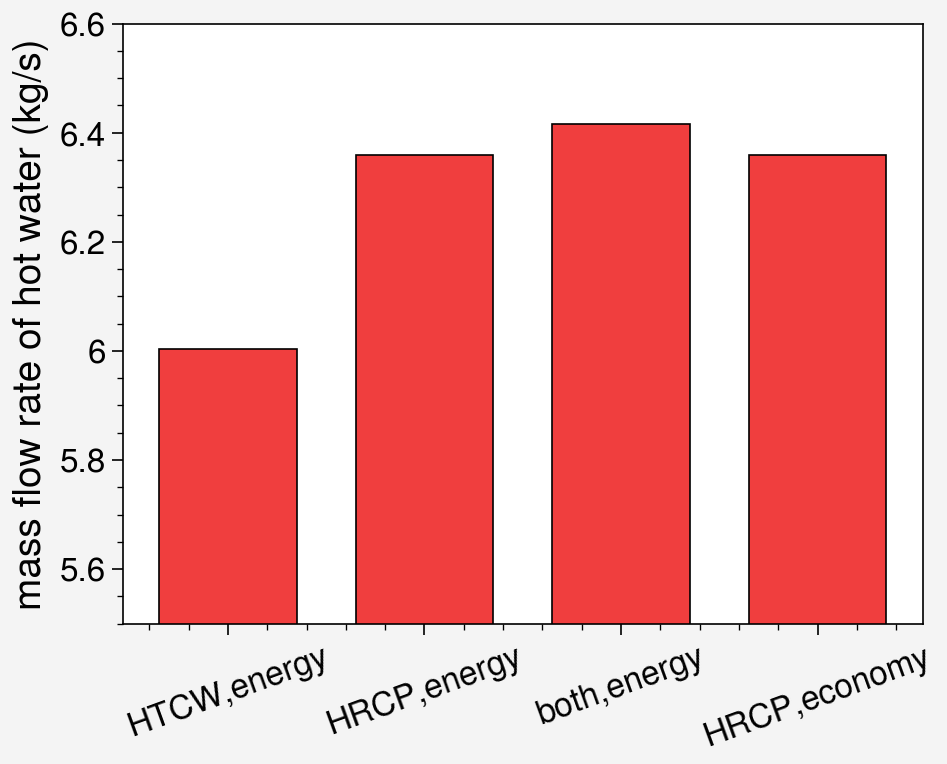

In [26]:
rotation=20
with pplot.rc.context({'lines.linewidth': 2,"lines.marker":"o","ytick.labelsize":12,"xtick.labelsize":12,
    "axes.labelsize":14,"lines.markersize":4,"legend.fontsize":14,"axes.titlesize":14,"grid":False}):
    fig, ax = pplot.subplots(refaspect=(4, 3),axwidth=4)
    indexs=np.arange(0,len(labels))
    ax.bar(np.array(m_water), width=0.7, negpos=True, edgecolor='k')
    ax.set_xticks(ticks=indexs)
    ax.set_xticklabels(labels=labels,rotation=rotation)
    ax.format(ylim=[5.5,6.6])
    ax.set_ylabel(ylabel="mass flow rate of hot water (kg/s)")
    fig.savefig("./m_water.jpg", bbox_inches='tight')

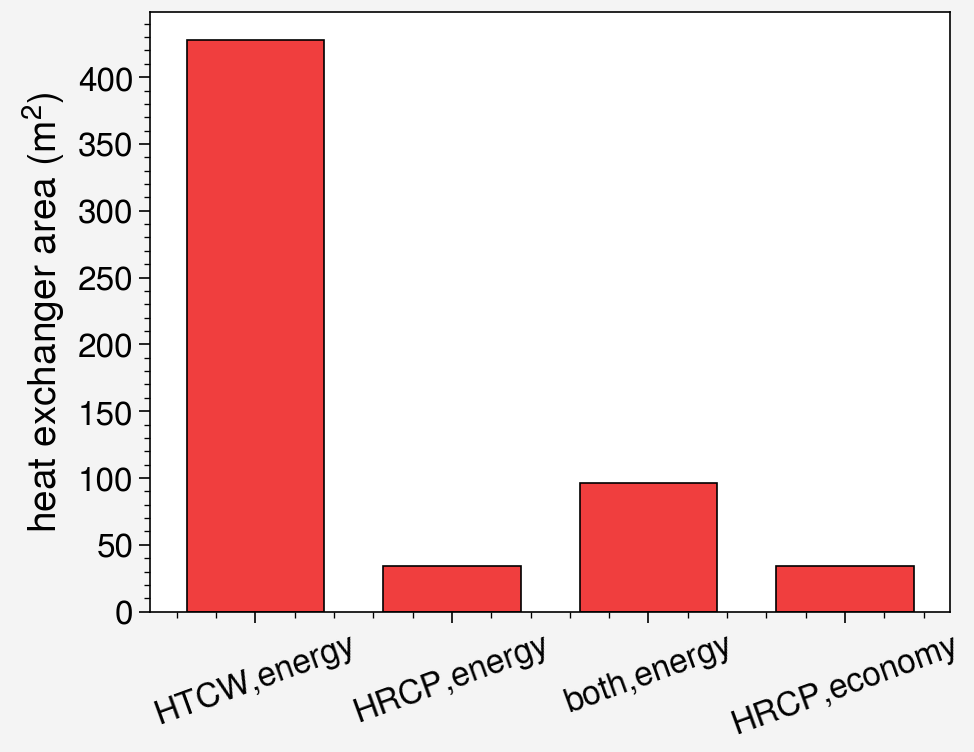

In [32]:
rotation=20
with pplot.rc.context({'lines.linewidth': 2,"lines.marker":"o","ytick.labelsize":12,"xtick.labelsize":12,
    "axes.labelsize":14,"lines.markersize":4,"legend.fontsize":14,"axes.titlesize":14,"grid":False}):
    fig, ax = pplot.subplots(refaspect=(4, 3),axwidth=4)
    indexs=np.arange(0,len(labels))
    ax.bar(np.array(carb_hen), width=0.7, negpos=True, edgecolor='k')
    ax.set_xticks(ticks=indexs)
    ax.set_xticklabels(labels=labels,rotation=rotation)
    # ax.format(ylim=[5.5,6.6])
    ax.set_ylabel(ylabel="heat exchanger area (m$^{2}$)")
    fig.savefig("./carb_HEN.jpg", bbox_inches='tight')